# Initial Data Analysis
**Data Science Practicum Group Eight**

In [ ]:
import argparse
import h5py
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
f = h5py.File("/data/mcw_ecg/ecg-traces/preprocessed/traces.hdf5", 'r')
print(len(f['signal']))

2322513


In [20]:
attributes_file = "/data/mcw_ecg/ecg-traces/annotations.csv"
df_attributes = pd.read_csv(attributes_file)
df_attributes["date_exam"] = df_attributes["date_exam"].astype("datetime64")
df_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322513 entries, 0 to 2322512
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id_exam     int64         
 1   id_patient  int64         
 2   age         int64         
 3   sex         object        
 4   1dAVb       int64         
 5   RBBB        int64         
 6   LBBB        int64         
 7   SB          int64         
 8   AF          int64         
 9   ST          int64         
 10  date_exam   datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 194.9+ MB


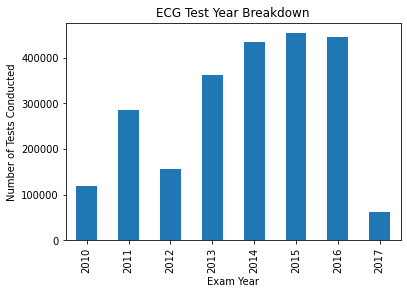

In [28]:
df_attributes.groupby(df_attributes["date_exam"].dt.year).count()['date_exam'].plot(kind="bar") 
plt.xlabel('Exam Year')
plt.ylabel('Number of Tests Conducted')
plt.title('ECG Test Year Breakdown')
plt.show()

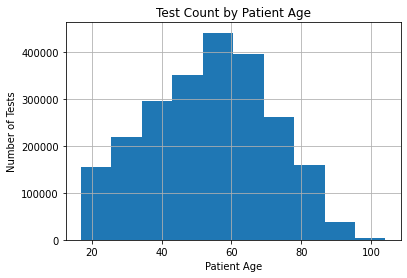

In [52]:
df_attributes.hist(column='age')
#df_attributes.groupby('age')['age'].plot.hist(rwidth=5)
plt.xlabel('Patient Age')
plt.ylabel('Number of Tests')
plt.title('Test Count by Patient Age')
plt.show()

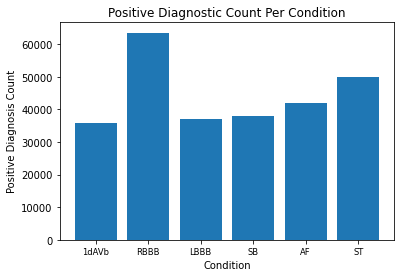

In [58]:
diagnostic_cols = ['1dAVb','RBBB','LBBB','SB','AF','ST']
counts = [df_attributes[x].sum() for x in diagnostic_cols]
plt.bar(range(len(diagnostic_cols)), counts, align='center')
plt.xticks(range(len(diagnostic_cols)), diagnostic_cols, size='small')
plt.title('Positive Diagnostic Count Per Condition')
plt.xlabel('Condition')
plt.ylabel('Positive Diagnosis Count')
plt.show()

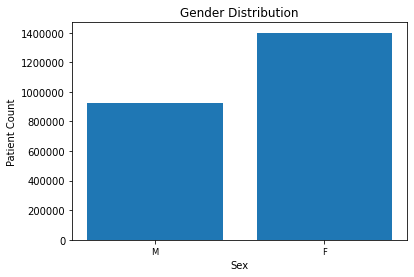

In [68]:
counts = [df_attributes[x].sum() for x in diagnostic_cols]
plt.bar([0, 1], [(df_attributes['sex'] == 'M').sum(), (df_attributes['sex'] == 'F').sum()], align='center')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks([0, 1], ['M', 'F'], size='small')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Patient Count')
plt.show()